<a href="https://colab.research.google.com/github/AquasaAziz247/fish-disease-detection/blob/main/_Fish_Disease_Detection_%26_Treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fish Disease Detection & Treatment

This project detects diseased vs healthy fish from underwater images using a Convolutional Neural Network (CNN) in TensorFlow/Keras.

**Pipeline:**
1. Dataset loading (Healthy / Diseased folders)
2. CNN Model training
3. Evaluation
4. Prediction on new images
5. Save labeled outputs
6. Export trained model for deployment

2️⃣ Mount Google Drive & Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/FishDataset'


3️⃣ Install Dependencies & Import Libraries

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


4️⃣ Data Preprocessing

In [ ]:
img_size = 224
batch_size = 32

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    data_dir + '/train',
    target_size=(img_size, img_size),
    class_mode='categorical',
    batch_size=batch_size
)

test_data = test_gen.flow_from_directory(
    data_dir + '/test',
    target_size=(img_size, img_size),
    class_mode='categorical',
    batch_size=batch_size
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/FishDataset/train'

5️⃣ Model Architecture

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: healthy and diseased
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

6️⃣ Train the Model

In [ ]:
history = model.fit(train_data, validation_data=test_data, epochs=50)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 1/16 ━━━━━━━━━━━━━━━━━━━━ 3:37 14s/step - accuracy: 0.4375 - loss: 0.6938

7️⃣ Evaluate the Model

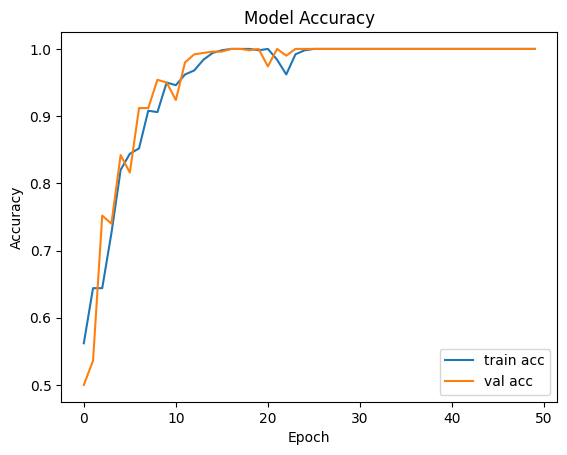

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


8️⃣ Predict on New Images & Save Results

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Healthy Fish (71).jpg to Healthy Fish (71).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step

✅ Prediction: This fish is 'healthy'


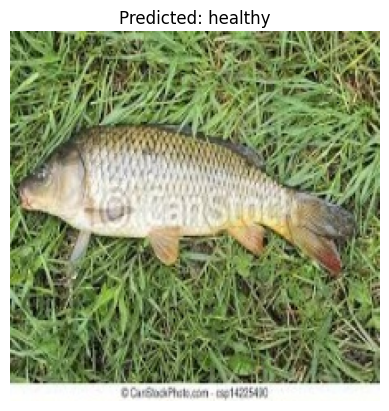

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Loop over uploaded images
for fn in uploaded.keys():
    # Load and preprocess image
    img = image.load_img(fn, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_names = list(train_data.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]

    # Show result
    print(f"\n✅ Prediction: This fish is '{predicted_class}'")

    # Display image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthy_fish_013.jpg to healthy_fish_013.jpg
Saving healthy_fish_016.jpg to healthy_fish_016.jpg
Saving healthy_fish_032.jpg to healthy_fish_032.jpg
Saving healthy_fish_033.jpg to healthy_fish_033.jpg
Saving healthy_fish_034.jpg to healthy_fish_034.jpg
Saving healthy_fish_039.jpg to healthy_fish_039.jpg
Saving healthy_fish_042.jpg to healthy_fish_042.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

✅ Prediction: This fish is 'healthy'


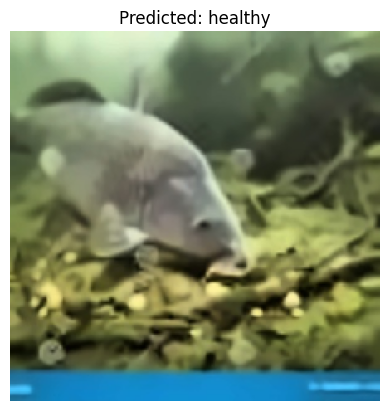

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

✅ Prediction: This fish is 'healthy'


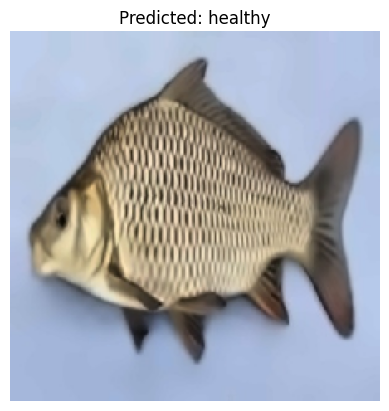

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

✅ Prediction: This fish is 'healthy'


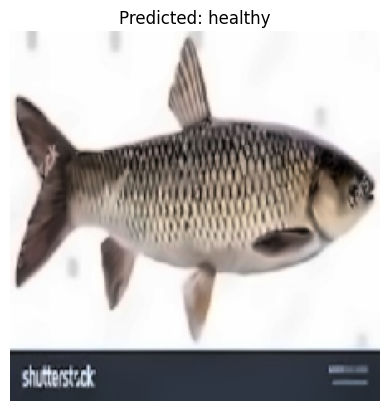

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

✅ Prediction: This fish is 'healthy'


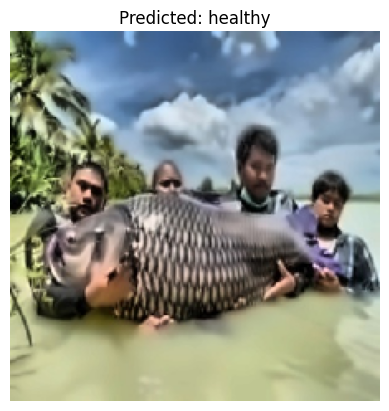

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

✅ Prediction: This fish is 'healthy'


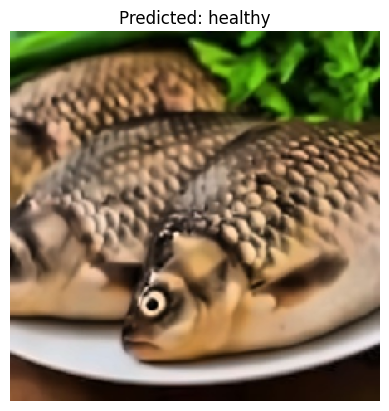

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

✅ Prediction: This fish is 'healthy'


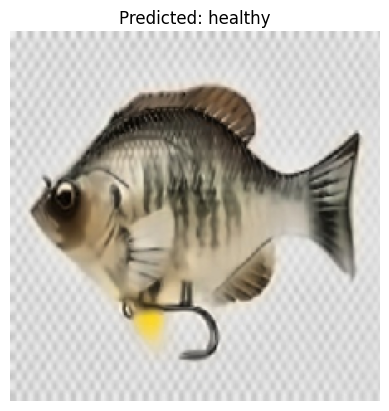

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

✅ Prediction: This fish is 'healthy'


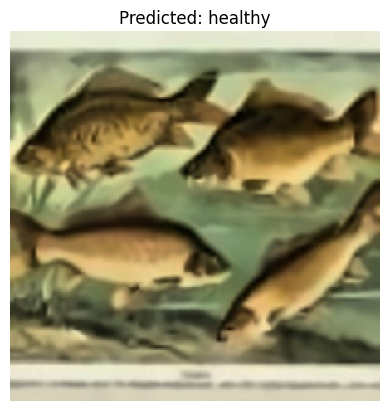

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Loop over uploaded images
for fn in uploaded.keys():
    # Load and preprocess image
    img = image.load_img(fn, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_names = list(train_data.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]

    # Show result
    print(f"\n✅ Prediction: This fish is '{predicted_class}'")

    # Display image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"\n✅ Model Accuracy on test set: {accuracy*100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 1.0000 - loss: 7.2673e-05

✅ Model Accuracy on test set: 100.00%


In [ ]:
import os

output_dir = "/content/predicted_results"
os.makedirs(output_dir, exist_ok=True)


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import shutil

uploaded = files.upload()

for fn in uploaded.keys():
    # Load image
    img = image.load_img(fn, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict class
    prediction = model.predict(img_array)
    class_names = list(train_data.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]

    # Rename file with predicted label
    new_filename = f"{predicted_class}_{fn}"
    new_filepath = os.path.join(output_dir, new_filename)

    # Save the uploaded file to the new path
    shutil.move(fn, new_filepath)

    print(f"✅ Saved: {new_filename}")


Saving Bacterial gill disease (5).jpeg to Bacterial gill disease (5).jpeg
Saving Bacterial gill disease (5).jpg to Bacterial gill disease (5).jpg
Saving Bacterial gill disease (5).png to Bacterial gill disease (5).png
Saving Bacterial gill disease (6).jpeg to Bacterial gill disease (6).jpeg
Saving Bacterial gill disease (6).jpg to Bacterial gill disease (6).jpg
Saving Bacterial gill disease (6).png to Bacterial gill disease (6).png
Saving Bacterial gill disease (7).jpeg to Bacterial gill disease (7).jpeg
Saving Bacterial gill disease (7).jpg to Bacterial gill disease (7).jpg
Saving Bacterial gill disease (8).jpeg to Bacterial gill disease (8).jpeg
Saving Bacterial gill disease (8).jpg to Bacterial gill disease (8).jpg
Saving Healthy Fish (52).jpg to Healthy Fish (52).jpg
Saving Healthy Fish (53).jpg to Healthy Fish (53).jpg
Saving Healthy Fish (54).jpg to Healthy Fish (54).jpg
Saving Healthy Fish (55).jpg to Healthy Fish (55).jpg
Saving Healthy Fish (56).jpg to Healthy Fish (56).jpg
Sa

In [ ]:
!zip -r predicted_results.zip predicted_results


  adding: predicted_results/ (stored 0%)
  adding: predicted_results/healthy_Healthy Fish (55).jpg (deflated 2%)
  adding: predicted_results/healthy_Bacterial gill disease (7).jpeg (deflated 1%)
  adding: predicted_results/healthy_Healthy Fish (53).jpg (deflated 1%)
  adding: predicted_results/healthy_Bacterial gill disease (8).jpeg (deflated 1%)
  adding: predicted_results/diseased_Bacterial gill disease (7).jpg (deflated 1%)
  adding: predicted_results/diseased_Bacterial gill disease (6).jpg (deflated 1%)
  adding: predicted_results/healthy_Healthy Fish (60).jpg (deflated 1%)
  adding: predicted_results/healthy_Bacterial gill disease (5).jpeg (deflated 1%)
  adding: predicted_results/healthy_Healthy Fish (52).jpg (deflated 1%)
  adding: predicted_results/healthy_Healthy Fish (61).jpg (deflated 2%)
  adding: predicted_results/healthy_Healthy Fish (54).jpg (deflated 3%)
  adding: predicted_results/healthy_Bacterial gill disease (5).png (deflated 1%)
  adding: predicted_results/healthy_

In [ ]:
from google.colab import files
files.download("predicted_results.zip")


In [ ]:
from google.colab import files
files.download("predicted_results.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# STEP 1: Set up
import os
import shutil
import numpy as np
import cv2
from google.colab import files
from tensorflow.keras.preprocessing import image

# Create output folder
output_dir = "/content/predicted_results"
os.makedirs(output_dir, exist_ok=True)

# Upload images
uploaded = files.upload()

# STEP 2: Loop through images, predict, label, and save
for fn in uploaded.keys():
    # Load with OpenCV for labeling
    img_cv = cv2.imread(fn)
    img_resized = cv2.resize(img_cv, (224, 224))

    # Prepare image for prediction
    img_array = image.img_to_array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    class_names = list(train_data.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]

    # Add label text to image
    labeled_img = img_resized.copy()
    cv2.putText(labeled_img, predicted_class, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)

    # Save to output folder
    out_path = os.path.join(output_dir, f"{predicted_class}_{fn}")
    cv2.imwrite(out_path, labeled_img)

    print(f"✅ Saved labeled image as: {predicted_class}_{fn}")

# STEP 3: Zip the results
!zip -r predicted_results.zip predicted_results

# STEP 4: Download the zip file
files.download("predicted_results.zip")


Saving Bacterial gill disease (5).jpeg to Bacterial gill disease (5).jpeg
Saving Bacterial gill disease (5).jpg to Bacterial gill disease (5).jpg
Saving Bacterial gill disease (5).png to Bacterial gill disease (5).png
Saving Bacterial gill disease (6).jpeg to Bacterial gill disease (6).jpeg
Saving Bacterial gill disease (6).jpg to Bacterial gill disease (6).jpg
Saving Bacterial gill disease (6).png to Bacterial gill disease (6).png
Saving Bacterial gill disease (7).jpeg to Bacterial gill disease (7).jpeg
Saving Bacterial gill disease (7).jpg to Bacterial gill disease (7).jpg
Saving Bacterial gill disease (8).jpeg to Bacterial gill disease (8).jpeg
Saving Bacterial gill disease (8).jpg to Bacterial gill disease (8).jpg
Saving Healthy Fish (52).jpg to Healthy Fish (52).jpg
Saving Healthy Fish (53).jpg to Healthy Fish (53).jpg
Saving Healthy Fish (54).jpg to Healthy Fish (54).jpg
Saving Healthy Fish (55).jpg to Healthy Fish (55).jpg
Saving Healthy Fish (56).jpg to Healthy Fish (56).jpg
Sa

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loss, accuracy = model.evaluate(test_data)
print(f"\n✅ Model Accuracy on Test Set: {accuracy * 100:.2f}%")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 1.0000 - loss: 3.7131e-05

✅ Model Accuracy on Test Set: 100.00%


9️⃣ Save & Download Model

In [ ]:
model.save("fish_disease_model.h5")


In [ ]:
from google.colab import files
files.download("fish_disease_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>